# **MLP**

**[Overview]**
1. 라이브러리 설정 
2. GPU 설정  
3. HyperParameter 설정
4. Data 준비
5. 모델 설계 
6. 모델 훈련 (Training)
7. 모델 검증 (Testing)

**1. 라이브러리**

In [39]:
import torch #pytorch 사용
import torch.nn as nn # neural network library from pytorch 사용 
import torch.nn.functional as F # pytorch 내부의 F 함수 사용
import torch.optim as optim # optimizer 사용
from torchvision import datasets, transforms  #dataset 불러오기 위해 사용 
import matplotlib.pyplot as plt # 시각화를 위한 matplotlib 사용
from torch.utils.data import DataLoader #Data를 batch_size로 나누기 위해 사용 
from tqdm.notebook import tqdm 

**2. GPU 설정**
 - cpu: 최대 24코어 
 - gpu: 단순한 연산(floating point) 덧셈 뺄셈 곱셈 나눗셈만 이것만 전문으로 하는 코어들을 수천개씩 가지고 있다 
 - 딥러닝은 기본적으로 행렬 곱하기 연산이기 때문에 딥러닝에는 gpu가 적합하다 

In [40]:
! nvidia-smi
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

Tue Jan 31 07:45:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**3. HyperParameter**

   - Parameter 
     * Parameter는 모델 내부에서 결정되는 변수 
     * 훈련 가능한 weight, bias 
   - HyperParameter 
     * 모델링 할 때 사용자가 직접 세팅해주는 값 

In [54]:
epochs= 10
batch_size= 64
lr= 1e-4
n_class= 10

# seed 
random_seed = 1234
torch.manual_seed(random_seed)
print(torch.randn(1, 3))

tensor([[ 0.0461,  0.4024, -1.0115]])


**4. Data 준비**
   - Dataset  
     * Dataset class는 전체 dataset을 구성하는 단계
     * __init__(self)
     * __get_item__(self, index)
     *__len__(self)
   - DataLoader 
     * Dataloader class는 batch기반의 딥러닝모델 학습을 위해서 mini batch를 만들어주는 역할 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

5


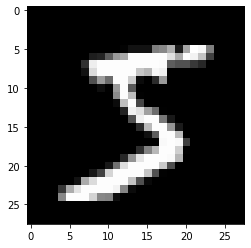

In [55]:

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, transform=transforms.ToTensor())
sample_data, label = train_dataset[0]

plt.imshow(sample_data.reshape((28, 28)), cmap='gray')
print(label)


In [56]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
print(f"[Dataset] train: {len(train_dataset)}, test: {len(test_dataset)}")
print(f"[DataLoader] train: {len(train_dataloader)}, test: {len(test_dataloader)}")

[Dataset] train: 60000, test: 10000
[DataLoader] train: 938, test: 10000


**5. Model 설계**

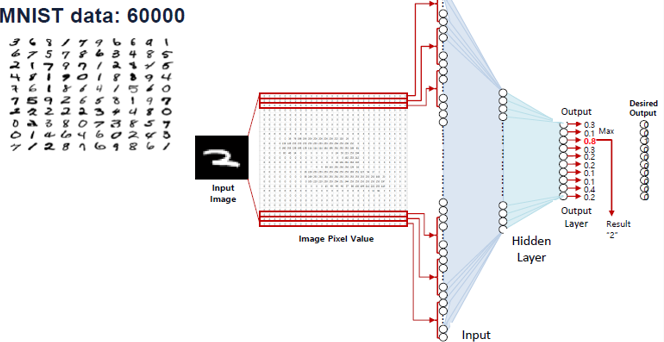

   - nn.Linear: 저장된 weight와 bias를 사용하여 선형 변환을 적용하는 모듈 
   - nn.Softmax: 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)됩니다.

In [61]:
class MLP(nn.Module):
    def __init__(self, n_class):
        super(MLP, self).__init__()
        self.linear1= nn.Linear(784, 784)
        self.linear2= nn.Linear(784, 512)
        self.linear3= nn.Linear(512, 256)
        self.linear4= nn.Linear(256, 256)
        self.linear5= nn.Linear(256, 256)
        self.linear6= nn.Linear(256, 256)
        self.linear7= nn.Linear(256, 256)
        self.classifier_layer= nn.Linear(256, n_class)
        self.softmax= nn.Softmax(dim=1)    

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        x = torch.sigmoid(self.linear4(x))
        x = torch.sigmoid(self.linear5(x))
        x = torch.sigmoid(self.linear6(x))
        x = torch.sigmoid(self.linear7(x))

        output= self.classifier_layer(x)
        return self.softmax(output)

#model 불러오기
model = MLP(n_class).to(device)

print("[모델 구조]")
print(model)
print()

[모델 구조]
MLP(
  (linear1): Linear(in_features=784, out_features=784, bias=True)
  (linear2): Linear(in_features=784, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=256, bias=True)
  (linear5): Linear(in_features=256, out_features=256, bias=True)
  (linear6): Linear(in_features=256, out_features=256, bias=True)
  (linear7): Linear(in_features=256, out_features=256, bias=True)
  (classifier_layer): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)



**6. Model 훈련(Training)**

* 모델 훈련? 
  -  모델 안에 있는 Parameter(weights, bias)의 최적의 값을 찾는것이다. 

* 모델 훈련 과정? 
  - Forward 
  - Backward
  - Optimizer.step()

**7. Model 검증(Testing)**
* 모델이 잘 학습되었는지 검증

In [62]:
loss_fnc= nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=lr)

epoch_train_loss=[]
epoch_test_loss=[]

for e in range(1, epochs+1):
    print(f"============= [Epochs] {e}/{epochs} =============")
    train_loss=0.0
    test_loss=0.0

    #train
    model.train()    
    for datas, labels in tqdm(train_dataloader):
        datas= datas.to(device)
        labels= labels.to(device)
        output= model(datas)
        loss= loss_fnc(output, labels)
        train_loss += loss.item()
        optimizer.zero_grad()        
        loss.backward()
        optimizer.step()
    epoch_train_loss.append(train_loss/len(train_dataloader))
    print(f"Train Loss: {train_loss/len(train_dataloader):.6f}")

    #test
    with torch.no_grad(): # autograd 엔진을 비활성화 
        model.eval() # dropout을 비활성화 시켜줌
        test_acc= 0.0
        for datas, labels in tqdm(test_dataloader):
            datas= datas.to(device)
            labels= labels.to(device)
            output= model(datas)
            loss = loss_fnc(output, labels)
            test_loss += loss.item()
            preds= torch.argmax(output, dim=1)
            test_acc+= preds.eq(labels).sum()
    epoch_test_loss.append(test_loss/len(test_dataloader))
    print(f"Test Loss: {test_loss/len(test_dataloader):.6f}")
    print(f"[Test Result] {(test_acc/len(test_dataloader))*100:.3f}%")

============= [Epochs] 1/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.301376


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.301403
[Test Result] 11.350%
============= [Epochs] 2/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.216431


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.202116
[Test Result] 21.090%
============= [Epochs] 3/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.204304


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.201668
[Test Result] 21.090%
============= [Epochs] 4/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.203724


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.200990
[Test Result] 21.200%
============= [Epochs] 5/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.203062


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.204435
[Test Result] 20.890%
============= [Epochs] 6/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.202590


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.200851
[Test Result] 21.230%
============= [Epochs] 7/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.203198


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.200757
[Test Result] 21.250%
============= [Epochs] 8/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.202808


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.204415
[Test Result] 20.880%
============= [Epochs] 9/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.203864


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.201599
[Test Result] 21.150%
============= [Epochs] 10/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Train Loss: 2.203221


  0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 2.200249
[Test Result] 21.270%


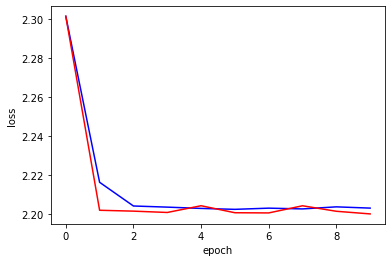

In [63]:
plt.plot(epoch_train_loss, 'b')
plt.plot(epoch_test_loss, 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

